In [210]:
import importlib
import utils
importlib.reload(utils)
from utils import *
from sklearn.model_selection import train_test_split

In [211]:
conso_tou = pd.read_csv("conso_heat_perif_toulouse")
conso_zur = pd.read_csv("conso_heat_perif_zurich")
conso_sev = pd.read_csv("conso_cool_perif_seville")
occ=pd.read_csv("Occupancy_per_hour",delimiter="\t")

In [212]:
occ=pd.read_csv("Meteo_Perif_Toulouse_Contemporain/Agen/Meteo_input",delimiter="\t")

In [238]:
consommation_partitionner_24h = {
    1: pd.read_csv("consommation_partitionner_24h_1.csv"),
    2: pd.read_csv("consommation_partitionner_24h_2.csv"),
    3: pd.read_csv("consommation_partitionner_24h_3.csv"),
    4: pd.read_csv("consommation_partitionner_24h_4.csv")
}

consommation_partitionner_48h = {
    1: pd.read_csv("consommation_partitionner_48h_1.csv"),
    2: pd.read_csv("consommation_partitionner_48h_2.csv"),
    3: pd.read_csv("consommation_partitionner_48h_3.csv"),
    4: pd.read_csv("consommation_partitionner_48h_4.csv")
}

In [214]:
files = {
    "agen": "Meteo_Perif_Toulouse_Contemporain/Agen/Simulation_Outputs",
    "albi": "Meteo_Perif_Toulouse_Contemporain/Albi/Simulation_Outputs",
    "auch": "Meteo_Perif_Toulouse_Contemporain/Auch/Simulation_Outputs",
    "toulouse": "Meteo_Perif_Toulouse_Contemporain/Toulouse/Simulation_Outputs",
    "Birmensdorf":"Meteo_Perif_Zurich_Contemporain/Birmensdorf/Simulation_Outputs",
    "Taenikon":"Meteo_Perif_Zurich_Contemporain/Taenikon/Simulation_Outputs",
    "Zurich_fluntern":"Meteo_Perif_Zurich_Contemporain/Zuerich_Fluntern/Simulation_Outputs",
    "Zurich_kloten":"Meteo_Perif_Zurich_Contemporain/Zuerich_kloten/Simulation_Outputs",
    "Cordoba": "Meteo_Perif_Seville_Contemporain/Cordoba/Simulation_Outputs",
    "Granada": "Meteo_Perif_Seville_Contemporain/Granada/Simulation_Outputs",
    "Malaga": "Meteo_Perif_Seville_Contemporain/Malaga/Simulation_Outputs",
    "Sevilla": "Meteo_Perif_Seville_Contemporain/Sevilla/Simulation_Outputs"   
}

files3 = {
    "agen": "Meteo_Perif_Toulouse_Contemporain/Agen/Meteo_input",
    "albi": "Meteo_Perif_Toulouse_Contemporain/Albi/Meteo_input",
    "auch": "Meteo_Perif_Toulouse_Contemporain/Auch/Meteo_input",
    "toulouse": "Meteo_Perif_Toulouse_Contemporain/Toulouse/Meteo_input",
    "Birmensdorf":"Meteo_Perif_Zurich_Contemporain/Birmensdorf/Meteo_input",
    "Taenikon":"Meteo_Perif_Zurich_Contemporain/Taenikon/Meteo_input",
    "Zurich_fluntern":"Meteo_Perif_Zurich_Contemporain/Zuerich_Fluntern/Meteo_input",
    "Zurich_kloten":"Meteo_Perif_Zurich_Contemporain/Zuerich_kloten/Meteo_input",
    "Cordoba": "Meteo_Perif_Seville_Contemporain/Cordoba/Meteo_input",
    "Granada": "Meteo_Perif_Seville_Contemporain/Granada/Meteo_input",
    "Malaga": "Meteo_Perif_Seville_Contemporain/Malaga/Meteo_input",
    "Sevilla": "Meteo_Perif_Seville_Contemporain/Sevilla/Meteo_input"  
}

In [215]:
for city, path in files.items():
      globals()[f"Text_{city}"] = extract_columns(files[city],1)

for city3, path3 in files3.items():
      globals()[f"hum_{city3}"] = extract_columns(files3[city3],3)  

for city4, path4 in files3.items():
      globals()[f"wind_{city4}"] = extract_columns(files3[city4],4)  

for city5, path5 in files3.items():
      globals()[f"solar_{city5}"] = extract_columns(files3[city5],5)  

for city6, path6 in files3.items():
      globals()[f"ground_{city6}"] = extract_columns(files3[city6],10)  

occupation=extract_columns("Occupancy_per_hour",1)  

In [216]:
valeurs_uniques, occurrences = np.unique(solar_auch, return_counts=True)

print("Valeurs uniques :", valeurs_uniques)
print("Occurrences :", occurrences)


Valeurs uniques : [21.38275824 21.38525276 21.38700437 ... 89.49522762 89.5
 90.        ]
Occurrences : [   1    1    1 ...    1   53 3990]


In [217]:
Text_combined_tou = pd.concat([Text_agen, Text_albi,Text_auch,Text_toulouse], axis=0).reset_index(drop=True)
Text_combined_zur = pd.concat([Text_Birmensdorf,Text_Taenikon,Text_Zurich_fluntern,Text_Zurich_kloten], axis=0).reset_index(drop=True)
Text_combined_sev = pd.concat([Text_Cordoba, Text_Granada,Text_Malaga,Text_Sevilla], axis=0).reset_index(drop=True)

Text_conso_heat_tou=Text_combined_tou.copy()
Text_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_heat_tou['clusters'] = conso_tou['clusters']
Text_conso_heat_tou.columns = Text_conso_heat_tou.columns.astype(str)

Text_conso_heat_zur=Text_combined_zur.copy()
Text_conso_heat_zur['heat_on'] = conso_zur['heat_on']
Text_conso_heat_zur['clusters'] = conso_zur['clusters']
Text_conso_heat_zur.columns = Text_conso_heat_zur.columns.astype(str)

Text_conso_cool_sev=Text_combined_sev.copy()
Text_conso_cool_sev['cool_on'] = conso_sev['cool_on']
Text_conso_cool_sev['clusters'] = conso_sev['clusters']
Text_conso_cool_sev.columns = Text_conso_cool_sev.columns.astype(str)


Text_occ_agen = pd.concat([Text_agen,occupation],axis=1).reset_index(drop=True)
Text_occ_albi = pd.concat([Text_albi,occupation],axis=1).reset_index(drop=True)
Text_occ_auch = pd.concat([Text_auch,occupation],axis=1).reset_index(drop=True)
Text_occ_toulouse = pd.concat([Text_toulouse,occupation],axis=1).reset_index(drop=True)
Text_occ_combined_tou = pd.concat([Text_occ_agen, Text_occ_albi,Text_occ_auch,Text_occ_toulouse], axis=0).reset_index(drop=True)
Text_occ_conso_heat_tou=Text_occ_combined_tou.copy()
Text_occ_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Text_occ_conso_heat_tou['clusters'] = conso_tou['clusters']
Text_occ_conso_heat_tou.columns = Text_occ_conso_heat_tou.columns.astype(str)


Hum_combined_tou = pd.concat([hum_agen, hum_albi,hum_auch,hum_toulouse], axis=0).reset_index(drop=True)
Hum_conso_heat_tou=Hum_combined_tou.copy()
Hum_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Hum_conso_heat_tou['clusters'] = conso_tou['clusters']
Hum_conso_heat_tou.columns = Hum_conso_heat_tou.columns.astype(str)


Wind_combined_tou=pd.concat([wind_agen, wind_albi,wind_auch,wind_toulouse], axis=0).reset_index(drop=True)
Wind_combined_zur=pd.concat([wind_Birmensdorf,wind_Taenikon,wind_Zurich_fluntern,wind_Zurich_kloten], axis=0).reset_index(drop=True)
Wind_combined_sev=pd.concat([wind_Cordoba, wind_Granada,wind_Malaga,wind_Sevilla], axis=0).reset_index(drop=True)

Wind_conso_heat_tou=Wind_combined_tou.copy()
Wind_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Wind_conso_heat_tou['clusters'] = conso_tou['clusters']
Wind_conso_heat_tou.columns = Wind_conso_heat_tou.columns.astype(str)

Solar_combined_tou=pd.concat([solar_agen, solar_albi,solar_auch,solar_toulouse], axis=0).reset_index(drop=True)
Solar_combined_zur=pd.concat([solar_Birmensdorf,solar_Taenikon,solar_Zurich_fluntern,solar_Zurich_kloten], axis=0).reset_index(drop=True)
Solar_combined_sev=pd.concat([solar_Cordoba, solar_Granada,solar_Malaga,solar_Sevilla], axis=0).reset_index(drop=True)

Solar_conso_heat_tou=Solar_combined_tou.copy()
Solar_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Solar_conso_heat_tou['clusters'] = conso_tou['clusters']
Solar_conso_heat_tou.columns = Solar_conso_heat_tou.columns.astype(str)

Ground_combined_tou=pd.concat([ground_agen, ground_albi,ground_auch,ground_toulouse], axis=0).reset_index(drop=True)
Ground_combined_zur=pd.concat([ground_Birmensdorf,ground_Taenikon,ground_Zurich_fluntern,ground_Zurich_kloten], axis=0).reset_index(drop=True)
Ground_combined_sev=pd.concat([ground_Cordoba, ground_Granada,ground_Malaga,ground_Sevilla], axis=0).reset_index(drop=True)

Ground_conso_heat_tou=Ground_combined_tou.copy()
Ground_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Ground_conso_heat_tou['clusters'] = conso_tou['clusters']
Ground_conso_heat_tou.columns = Ground_conso_heat_tou.columns.astype(str)

In [218]:
Text_Wind_Solar_Ground_conso_heat_tou=pd.concat([Text_combined_tou, Solar_combined_tou,Ground_conso_heat_tou], axis=1).reset_index(drop=True)
Text_Wind_Solar_Ground_conso_heat_tou.columns = Text_Wind_Solar_Ground_conso_heat_tou.columns.astype(str)


In [219]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


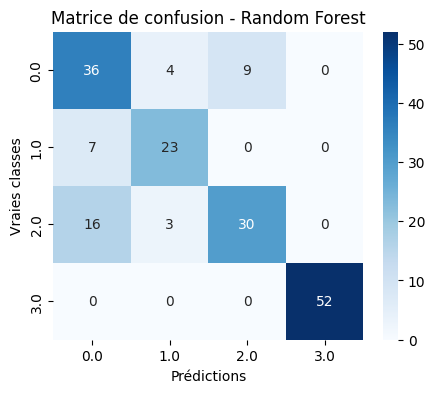

Random Forest - Accuracy: 0.7833 - F1 Score: 0.7838 - Temps d'exécution: 0.3989 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


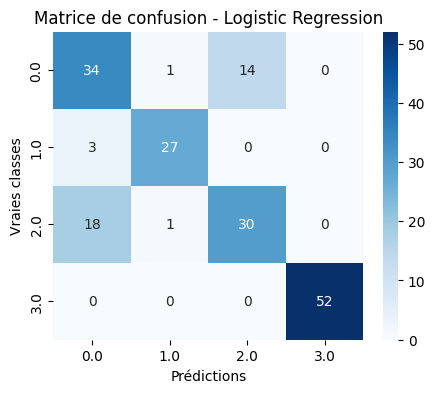

Logistic Regression - Accuracy: 0.7944 - F1 Score: 0.7950 - Temps d'exécution: 0.4470 sec
###################################################################

 Évaluation de SVC avec train_test_split...


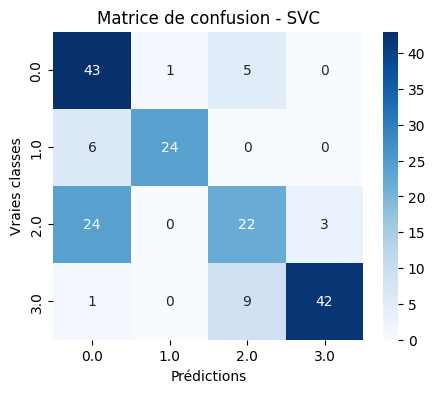

SVC - Accuracy: 0.7278 - F1 Score: 0.7269 - Temps d'exécution: 0.0349 sec
###################################################################

 Évaluation de KNN avec train_test_split...


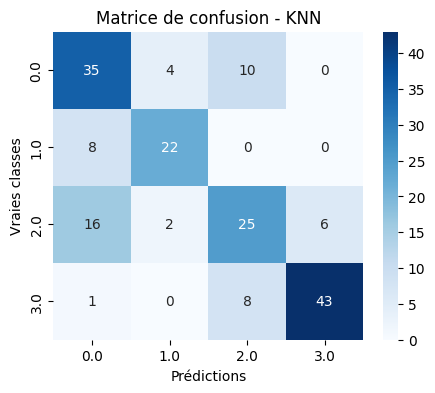

KNN - Accuracy: 0.6944 - F1 Score: 0.6952 - Temps d'exécution: 0.0259 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


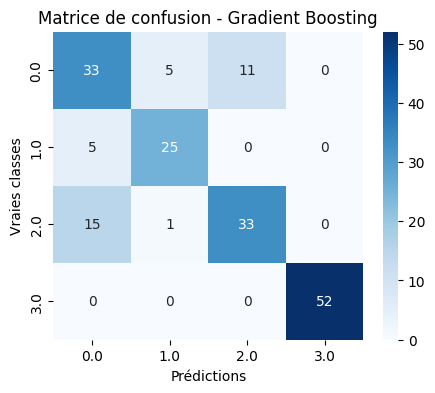

Gradient Boosting - Accuracy: 0.7944 - F1 Score: 0.7948 - Temps d'exécution: 3.0092 sec
###################################################################


In [244]:
print("*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries*************************************************")
X = Text_conso_heat_tou.drop(columns=["clusters"])
y = Text_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)

results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [82]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8630 - F1 Score: 0.8634 - Temps d'exécution: 3.2556 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8769 - Temps d'exécution: 0.3915 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8555 - F1 Score: 0.8564 - Temps d'exécution: 0.2839 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8582 - F1 Score: 0.8584 - Temps d'exécution: 0.0469 sec
####################################

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT  à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


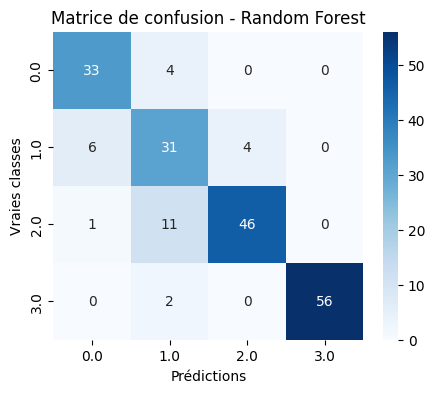

Random Forest - Accuracy: 0.8557 - F1 Score: 0.8591 - Temps d'exécution: 0.3788 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


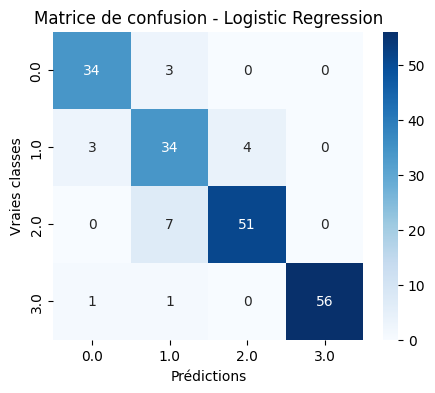

Logistic Regression - Accuracy: 0.9021 - F1 Score: 0.9036 - Temps d'exécution: 0.3356 sec
###################################################################

 Évaluation de SVC avec train_test_split...


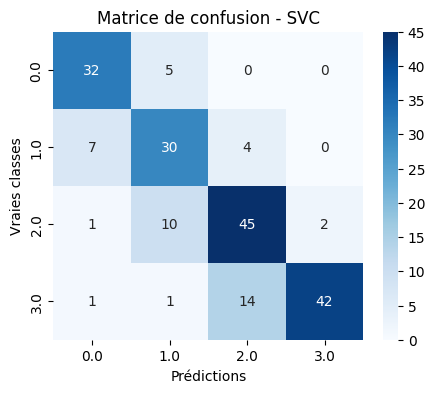

SVC - Accuracy: 0.7680 - F1 Score: 0.7708 - Temps d'exécution: 0.0390 sec
###################################################################

 Évaluation de KNN avec train_test_split...


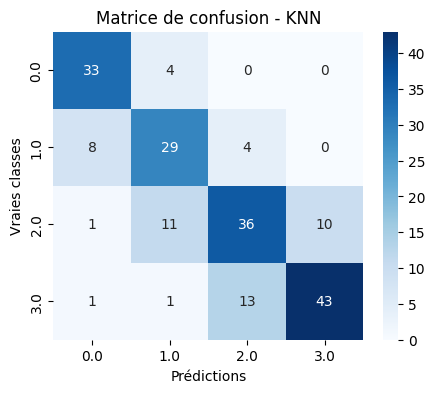

KNN - Accuracy: 0.7268 - F1 Score: 0.7254 - Temps d'exécution: 0.0177 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


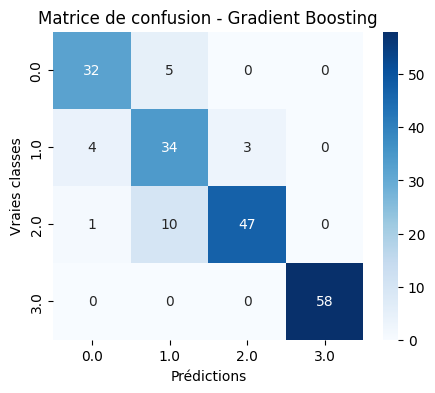

Gradient Boosting - Accuracy: 0.8814 - F1 Score: 0.8838 - Temps d'exécution: 2.8135 sec
###################################################################


In [83]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT  à zurich et ses périphéries*************************************************")
X = Text_conso_heat_zur.drop(columns=["clusters"])
y = Text_conso_heat_zur["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [84]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à zurich et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8938 - F1 Score: 0.8941 - Temps d'exécution: 3.2486 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9103 - F1 Score: 0.9106 - Temps d'exécution: 0.3722 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9000 - F1 Score: 0.9005 - Temps d'exécution: 0.3043 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8904 - F1 Score: 0.8910 - Temps d'exécution: 0.0625 sec
######################################

*************************************************Prédiction de la  consommation de  climatisation en fonction de TEXT  à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


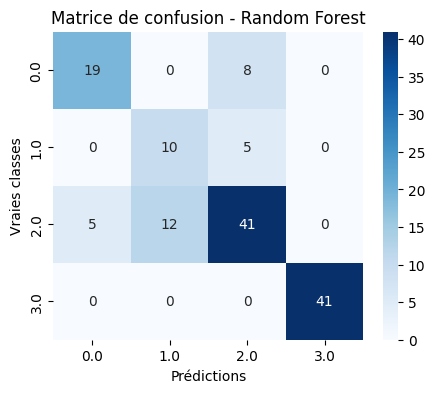

Random Forest - Accuracy: 0.7872 - F1 Score: 0.7921 - Temps d'exécution: 0.3161 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


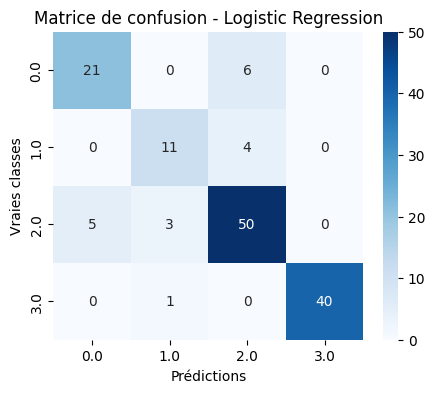

Logistic Regression - Accuracy: 0.8652 - F1 Score: 0.8656 - Temps d'exécution: 0.4079 sec
###################################################################

 Évaluation de SVC avec train_test_split...


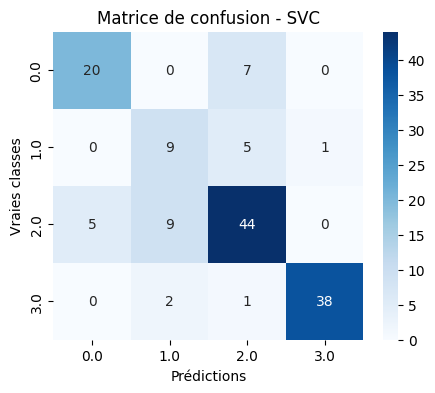

SVC - Accuracy: 0.7872 - F1 Score: 0.7930 - Temps d'exécution: 0.0245 sec
###################################################################

 Évaluation de KNN avec train_test_split...


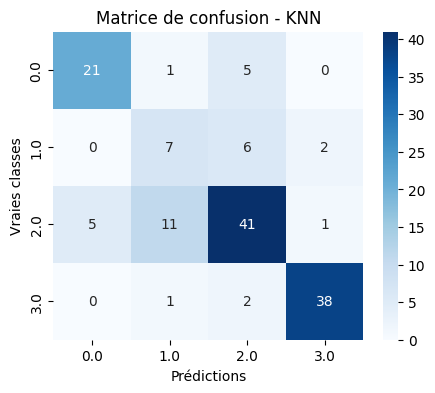

KNN - Accuracy: 0.7589 - F1 Score: 0.7650 - Temps d'exécution: 0.0286 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


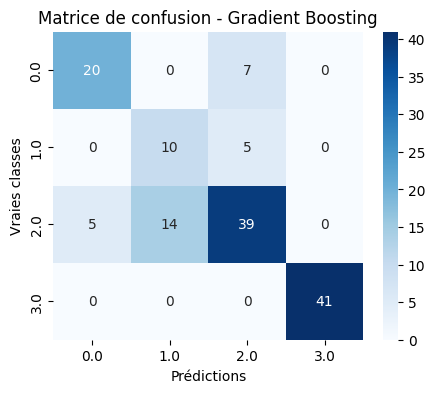

Gradient Boosting - Accuracy: 0.7801 - F1 Score: 0.7870 - Temps d'exécution: 2.3400 sec
###################################################################


In [85]:
print("*************************************************Prédiction de la  consommation de  climatisation en fonction de TEXT  à zurich et ses périphéries*************************************************")
X = Text_conso_cool_sev.drop(columns=["clusters"])
y = Text_conso_cool_sev["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [86]:
print("*************************************************Prédiction de la  consommation de climatisation en fonction de TEXT à zurich et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de climatisation en fonction de TEXT à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9062 - F1 Score: 0.9061 - Temps d'exécution: 2.9586 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9253 - F1 Score: 0.9252 - Temps d'exécution: 0.4701 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9062 - F1 Score: 0.9065 - Temps d'exécution: 0.2520 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8979 - F1 Score: 0.8979 - Temps d'exécution: 0.0677 sec
##################################

**************************************Prédiction de la  consommation de  chauffage en fonction de TEXT et occupation à toulouse et ses périphéries************************************

 Évaluation de Random Forest avec train_test_split...


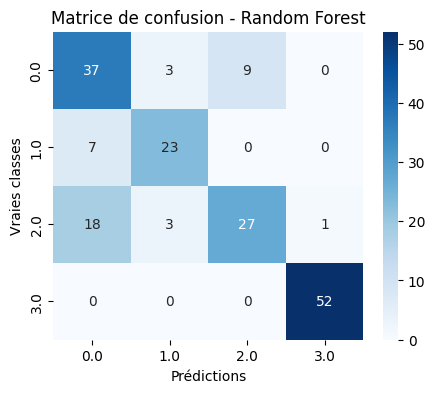

Random Forest - Accuracy: 0.7722 - F1 Score: 0.7705 - Temps d'exécution: 0.4361 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


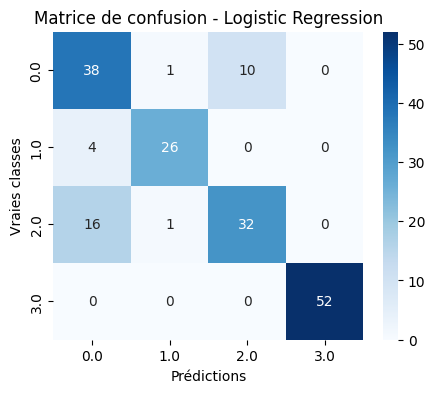

Logistic Regression - Accuracy: 0.8222 - F1 Score: 0.8231 - Temps d'exécution: 0.5202 sec
###################################################################

 Évaluation de SVC avec train_test_split...


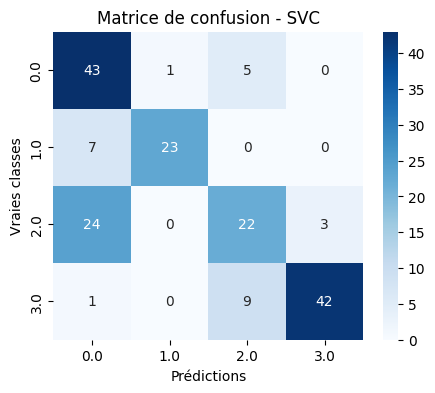

SVC - Accuracy: 0.7222 - F1 Score: 0.7219 - Temps d'exécution: 0.0389 sec
###################################################################

 Évaluation de KNN avec train_test_split...


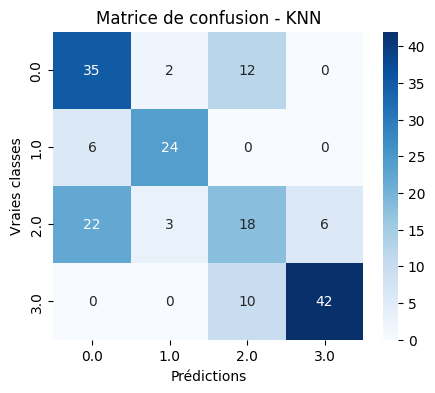

KNN - Accuracy: 0.6611 - F1 Score: 0.6585 - Temps d'exécution: 0.0191 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


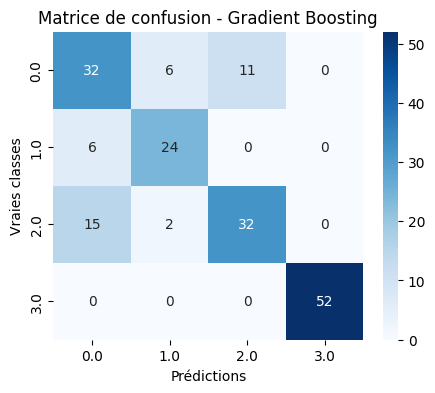

Gradient Boosting - Accuracy: 0.7778 - F1 Score: 0.7781 - Temps d'exécution: 2.6369 sec
###################################################################


In [87]:
print("**************************************Prédiction de la  consommation de  chauffage en fonction de TEXT et occupation à toulouse et ses périphéries************************************")
X = Text_occ_conso_heat_tou.drop(columns=["clusters"])
y = Text_occ_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [88]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT et occupation à toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT et occupation à toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8603 - F1 Score: 0.8598 - Temps d'exécution: 3.2546 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8801 - F1 Score: 0.8804 - Temps d'exécution: 0.5686 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8575 - F1 Score: 0.8587 - Temps d'exécution: 0.3884 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8521 - F1 Score: 0.8524 - Temps d'exécution: 0.0692 sec
######################

*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT et humidite à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


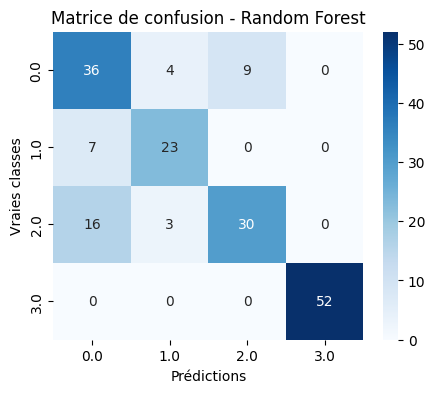

Random Forest - Accuracy: 0.7833 - F1 Score: 0.7838 - Temps d'exécution: 0.3445 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


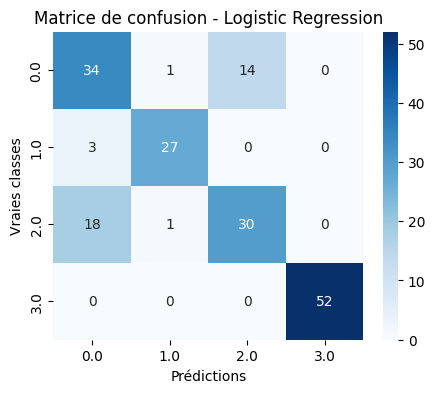

Logistic Regression - Accuracy: 0.7944 - F1 Score: 0.7950 - Temps d'exécution: 0.4652 sec
###################################################################

 Évaluation de SVC avec train_test_split...


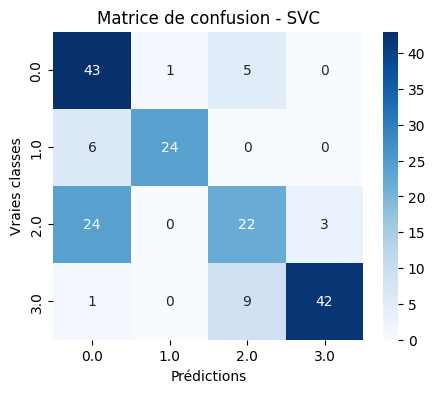

SVC - Accuracy: 0.7278 - F1 Score: 0.7269 - Temps d'exécution: 0.0266 sec
###################################################################

 Évaluation de KNN avec train_test_split...


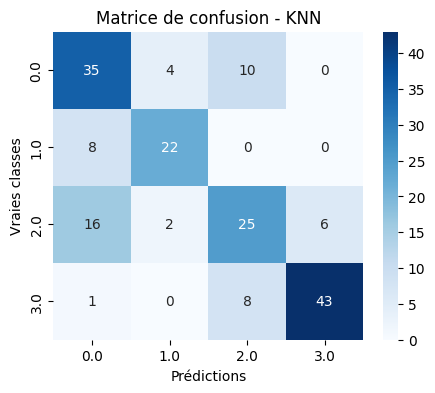

KNN - Accuracy: 0.6944 - F1 Score: 0.6952 - Temps d'exécution: 0.0137 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


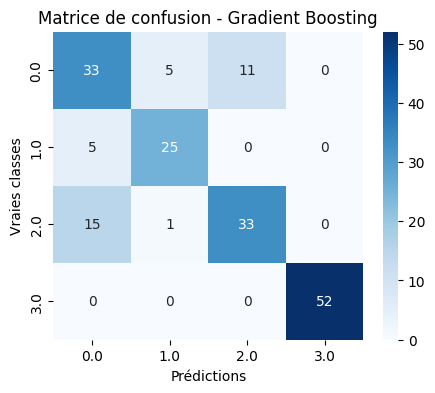

Gradient Boosting - Accuracy: 0.7944 - F1 Score: 0.7948 - Temps d'exécution: 2.4815 sec
###################################################################


In [19]:
print("*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT et humidite à Toulouse et ses périphéries*************************************************")
X = Text_combined_tou.drop(columns=["clusters"])
y = Text_combined_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [20]:
print("*************************************************Prédiction de la  consommation de chauffagr  en fonction de TEXT et humidite à toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffagr  en fonction de TEXT et humidite à toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8630 - F1 Score: 0.8634 - Temps d'exécution: 3.0889 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8769 - Temps d'exécution: 0.3882 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8555 - F1 Score: 0.8564 - Temps d'exécution: 0.2707 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8582 - F1 Score: 0.8584 - Temps d'exécution: 0.0625 sec
#######################

In [196]:
final_combined_df = pd.read_csv("final_combined_df")

In [197]:
models2 = {
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Logistic Regression": MultiOutputClassifier(LogisticRegression(random_state=42, max_iter=1000)),
    "SVC": MultiOutputClassifier(SVC(random_state=42)),
    "KNN": MultiOutputClassifier(KNeighborsClassifier()),
    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier(random_state=42))
}

In [189]:
final_combined_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,heat_on,cluster_1,cluster_2,cluster_3,cluster_4
0,0.000000,1157.438356,1179.256349,1215.122698,1241.422003,1246.896370,1516.686790,1770.819268,2002.668640,1882.432682,...,550.901415,646.370512,743.109752,835.762224,925.102476,1.0,2.0,0.0,0.0,1.0
1,1023.735651,1144.713221,1264.288972,1352.070340,1426.638282,1483.600300,1881.251064,2279.915430,2662.899888,2644.568959,...,1410.426252,1484.021184,1554.364636,1628.042458,1723.508126,1.0,2.0,0.0,1.0,0.0
2,1769.081330,1770.565050,1799.956328,1827.384501,1847.015255,1836.463560,2188.904796,2526.527911,2850.785657,2764.581418,...,1181.637932,1266.377242,1360.725885,1447.030186,1549.785070,1.0,2.0,1.0,3.0,0.0
3,1633.359656,1697.758517,1803.763244,1891.414067,1954.617022,1994.245885,2447.772785,2903.100259,3332.536806,3168.648302,...,1369.680898,1507.258916,1641.319652,1772.840624,1902.411051,1.0,2.0,1.0,3.0,0.0
4,2025.702871,2141.614258,2257.005090,2353.460432,2434.619415,2492.738420,3088.010821,3677.398736,4255.936908,3371.175836,...,0.000000,0.000000,46.955345,158.257900,391.488571,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3058.299936,3138.135681,3218.237312,3293.155761,3370.308807,3415.291165,4219.378015,5012.049844,5780.923344,5244.130292,...,1830.489975,2005.155298,2161.124934,2306.765084,2449.259909,1.0,1.0,3.0,1.0,2.0
1456,2562.762765,2636.769754,2704.772756,2770.856711,2830.351129,2862.687459,3552.878300,4220.360819,4866.207851,4534.375521,...,1740.933433,1837.902088,1928.618153,2012.857538,2091.882911,1.0,1.0,3.0,1.0,2.0
1457,2178.776024,2286.388782,2391.737767,2477.083771,2552.665620,2625.224561,3219.169890,3835.120643,3858.275356,3483.411091,...,1017.304426,1132.219242,1241.276953,1340.251440,1424.612887,1.0,1.0,1.0,0.0,0.0
1458,1495.170934,1546.801601,1591.333293,1636.184136,1670.777598,1700.505039,1731.820266,1759.722521,1788.670254,1758.103182,...,1645.752598,1664.723577,1712.786774,1772.262386,1824.923930,1.0,2.0,0.0,3.0,0.0


In [168]:
Text_conso_heat_tou_parti=Text_combined_tou.copy()
Text_conso_heat_tou_parti['heat_on'] = final_combined_df['heat_on']
Text_conso_heat_tou_parti[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']] = final_combined_df[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']]
Text_conso_heat_tou_parti.columns = Text_conso_heat_tou_parti.columns.astype(str)

In [169]:

X = Text_conso_heat_tou_parti.iloc[:, :-4].values  
y = Text_conso_heat_tou_parti.iloc[:, -4:].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = standardize_data(X_train)
X_test = standardize_data(X_test)

print("************************************************* (partitionnement des donnees )Prédiction de la  consommation de chauffagr  en fonction de TEXT  à toulouse et ses périphéries*************************************************")

results_split=evaluate_models_split_multi_label(X_train, X_test, y_train, y_test, models2)


************************************************* (partitionnement des donnees )Prédiction de la  consommation de chauffagr  en fonction de TEXT  à toulouse et ses périphéries*************************************************

Évaluation de Random Forest avec train_test_split...
Random Forest - Accuracy: 0.7854 - F1 Score: 0.9413 - 0/1 Loss: 0.2146 - Hamming Loss: 0.0557 - Temps d'exécution: 1.6728 sec
###################################################################

Évaluation de Logistic Regression avec train_test_split...
Logistic Regression - Accuracy: 0.7626 - F1 Score: 0.9375 - 0/1 Loss: 0.2374 - Hamming Loss: 0.0616 - Temps d'exécution: 0.0781 sec
###################################################################

Évaluation de SVC avec train_test_split...
SVC - Accuracy: 0.7763 - F1 Score: 0.9407 - 0/1 Loss: 0.2237 - Hamming Loss: 0.0589 - Temps d'exécution: 0.0937 sec
###################################################################

Évaluation de KNN avec train_test_spli

In [170]:
results_cv=evaluate_models_cv_multi_label(X, y, models2, cv=4)


Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7932 - F1 Score: 0.9394 - 0/1 Loss: 0.2068 - Hamming Loss: 0.0579 - Temps d'exécution: 19.7598 sec
###################################################################

Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7692 - F1 Score: 0.9381 - 0/1 Loss: 0.2308 - Hamming Loss: 0.0611 - Temps d'exécution: 7.4444 sec
###################################################################

Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.6815 - F1 Score: 0.8587 - 0/1 Loss: 0.3185 - Hamming Loss: 0.1390 - Temps d'exécution: 2.2220 sec
###################################################################

Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7062 - F1 Score: 0.8561 - 0/1 Loss: 0.2938 - Hamming Loss: 0.1374 - Temps d'exécution: 0.3386 sec
###############################################################

In [207]:
final_combined_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,heat_on,cluster_1,cluster_2,cluster_3,cluster_4
0,0.000000,1157.438356,1179.256349,1215.122698,1241.422003,1246.896370,1516.686790,1770.819268,2002.668640,1882.432682,...,550.901415,646.370512,743.109752,835.762224,925.102476,1.0,2.0,1.0,2.0,0.0
1,1023.735651,1144.713221,1264.288972,1352.070340,1426.638282,1483.600300,1881.251064,2279.915430,2662.899888,2644.568959,...,1410.426252,1484.021184,1554.364636,1628.042458,1723.508126,1.0,2.0,1.0,3.0,2.0
2,1769.081330,1770.565050,1799.956328,1827.384501,1847.015255,1836.463560,2188.904796,2526.527911,2850.785657,2764.581418,...,1181.637932,1266.377242,1360.725885,1447.030186,1549.785070,1.0,2.0,2.0,0.0,2.0
3,1633.359656,1697.758517,1803.763244,1891.414067,1954.617022,1994.245885,2447.772785,2903.100259,3332.536806,3168.648302,...,1369.680898,1507.258916,1641.319652,1772.840624,1902.411051,1.0,2.0,2.0,0.0,2.0
4,2025.702871,2141.614258,2257.005090,2353.460432,2434.619415,2492.738420,3088.010821,3677.398736,4255.936908,3371.175836,...,0.000000,0.000000,46.955345,158.257900,391.488571,1.0,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3058.299936,3138.135681,3218.237312,3293.155761,3370.308807,3415.291165,4219.378015,5012.049844,5780.923344,5244.130292,...,1830.489975,2005.155298,2161.124934,2306.765084,2449.259909,1.0,1.0,3.0,3.0,1.0
1456,2562.762765,2636.769754,2704.772756,2770.856711,2830.351129,2862.687459,3552.878300,4220.360819,4866.207851,4534.375521,...,1740.933433,1837.902088,1928.618153,2012.857538,2091.882911,1.0,1.0,3.0,3.0,1.0
1457,2178.776024,2286.388782,2391.737767,2477.083771,2552.665620,2625.224561,3219.169890,3835.120643,3858.275356,3483.411091,...,1017.304426,1132.219242,1241.276953,1340.251440,1424.612887,1.0,1.0,2.0,2.0,2.0
1458,1495.170934,1546.801601,1591.333293,1636.184136,1670.777598,1700.505039,1731.820266,1759.722521,1788.670254,1758.103182,...,1645.752598,1664.723577,1712.786774,1772.262386,1824.923930,1.0,2.0,1.0,0.0,2.0


In [190]:
final_combined_df_toulouse=final_combined_df.iloc[-365:,:]
final_combined_df_toulouse = final_combined_df_toulouse.reset_index(drop=True)


In [191]:
Text_conso_heat_toulouse=Text_toulouse.copy()
Text_conso_heat_toulouse['heat_on'] = final_combined_df_toulouse['heat_on']
Text_conso_heat_toulouse[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']] = final_combined_df_toulouse[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']]
Text_conso_heat_toulouse.columns = Text_conso_heat_toulouse.columns.astype(str)

In [202]:
Text_conso_heat_toulouse

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,heat_on,cluster_1,cluster_2,cluster_3,cluster_4
0,0.50,0.10,-0.75,-1.45,-1.95,-2.50,-3.00,-3.40,-3.70,-3.40,...,-2.85,-3.15,-3.45,-3.75,-4.05,1.0,1.0,3.0,3.0,0.0
1,-3.90,-3.20,-2.45,-1.85,-1.35,-0.85,-0.40,-0.05,0.25,1.75,...,8.90,8.50,8.05,7.60,7.20,1.0,1.0,1.0,0.0,1.0
2,6.45,5.25,4.00,3.05,2.40,1.75,1.15,0.65,0.40,1.30,...,4.75,3.80,2.85,1.95,1.05,1.0,2.0,1.0,0.0,1.0
3,0.35,-0.25,-0.90,-1.40,-1.75,-2.10,-2.45,-2.70,-2.85,-1.95,...,2.40,2.00,1.60,1.20,0.80,1.0,2.0,1.0,0.0,1.0
4,0.55,0.50,0.50,0.50,0.50,0.50,0.55,0.60,0.65,0.80,...,6.70,6.75,6.80,6.85,6.95,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-3.25,-3.25,-3.30,-3.35,-3.45,-3.50,-3.55,-3.60,-3.60,-3.00,...,-0.55,-0.80,-1.00,-1.20,-1.45,1.0,1.0,3.0,1.0,2.0
361,-1.55,-1.40,-1.25,-1.15,-1.05,-0.95,-0.85,-0.75,-0.65,0.15,...,4.45,4.30,4.15,4.00,3.85,1.0,1.0,3.0,1.0,2.0
362,3.60,3.15,2.70,2.40,2.15,1.90,1.70,1.50,1.45,2.20,...,6.30,6.30,6.25,6.20,6.20,1.0,1.0,1.0,0.0,0.0
363,6.25,6.40,6.55,6.65,6.80,6.95,7.05,7.15,7.20,7.55,...,9.20,9.20,8.95,8.60,8.30,1.0,2.0,0.0,3.0,0.0


In [200]:
Text_conso_heat_tou_perif

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,heat_on,cluster_1,cluster_2,cluster_3,cluster_4
0,10.40,10.45,10.40,10.25,10.20,10.15,10.10,10.10,10.15,10.50,...,12.25,11.95,11.60,11.25,10.90,1.0,2.0,1.0,2.0,0.0
1,10.45,9.80,9.15,8.75,8.45,8.10,7.80,7.55,7.40,7.45,...,8.45,8.20,7.95,7.65,7.15,1.0,2.0,1.0,3.0,2.0
2,7.05,7.30,7.30,7.30,7.35,7.45,7.50,7.55,7.60,7.85,...,10.70,10.30,9.80,9.35,8.75,1.0,2.0,2.0,0.0,2.0
3,8.30,8.00,7.35,6.85,6.55,6.25,5.95,5.70,5.60,6.00,...,7.75,7.10,6.45,5.80,5.15,1.0,2.0,2.0,0.0,2.0
4,4.55,4.00,3.45,3.05,2.75,2.45,2.25,2.10,2.00,3.00,...,8.10,7.55,7.05,6.50,5.95,1.0,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.10,-0.60,-1.40,-2.05,-2.55,-3.05,-3.45,-3.80,-4.05,-3.30,...,-0.70,-1.45,-2.15,-2.85,-3.55,1.0,1.0,3.0,0.0,2.0
1091,-3.95,-4.00,-4.00,-4.00,-3.95,-3.90,-3.90,-3.85,-3.70,-2.10,...,6.45,6.10,5.75,5.40,5.05,1.0,1.0,3.0,2.0,0.0
1092,4.60,3.95,3.30,2.80,2.45,2.10,1.80,1.55,1.40,2.15,...,6.10,5.75,5.40,5.05,4.75,1.0,2.0,2.0,2.0,2.0
1093,4.50,4.30,4.10,3.95,3.85,3.75,3.70,3.65,3.60,3.80,...,4.65,4.30,4.25,4.45,4.35,1.0,2.0,1.0,3.0,1.0


In [198]:
final_combined_df_toulouse2=final_combined_df.iloc[:-365,:]
final_combined_df_toulouse2 = final_combined_df_toulouse2.reset_index(drop=True)
Text_conso_heat_tou_perif = pd.concat([Text_agen, Text_albi,Text_auch], axis=0).reset_index(drop=True)
Text_conso_heat_tou_perif['heat_on'] = final_combined_df_toulouse2['heat_on']
Text_conso_heat_tou_perif[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']] = final_combined_df_toulouse2[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']]
Text_conso_heat_tou_perif.columns = Text_conso_heat_tou_perif.columns.astype(str)


In [203]:
X_train = Text_conso_heat_tou_perif.iloc[:, :-4].values  
y_train = Text_conso_heat_tou_perif.iloc[:, -4:].values  
X_test = Text_conso_heat_toulouse+9.iloc[:, :-4].values  
y_test = Text_conso_heat_toulouse.iloc[:, -4:].values 
X_train = standardize_data(X_train)
X_test = standardize_data(X_test)

print("*************************************************(partitionnement des donnees )Prédiction de la  consommation de chauffagr  en fonction de TEXT test sur toulouse et train sur ses périphéries*************************************************")

results_split=evaluate_models_split_multi_label(X_train, X_test, y_train, y_test, models2)


*************************************************(partitionnement des donnees )Prédiction de la  consommation de chauffagr  en fonction de TEXT test sur toulouse et train sur ses périphéries*************************************************

Évaluation de Random Forest avec train_test_split...
Random Forest - Accuracy: 0.6849 - F1 Score: 0.9011 - 0/1 Loss: 0.3151 - Hamming Loss: 0.0877 - Temps d'exécution: 1.7994 sec
###################################################################

Évaluation de Logistic Regression avec train_test_split...
Logistic Regression - Accuracy: 0.7178 - F1 Score: 0.9190 - 0/1 Loss: 0.2822 - Hamming Loss: 0.0745 - Temps d'exécution: 0.1073 sec
###################################################################

Évaluation de SVC avec train_test_split...
SVC - Accuracy: 0.7397 - F1 Score: 0.9276 - 0/1 Loss: 0.2603 - Hamming Loss: 0.0685 - Temps d'exécution: 0.1187 sec
###################################################################

Évaluation de KNN avec 

**************************************Prédiction de la  consommation de  chauffage a zurich en fonction de TEXT  à toulouse et ses périphéries************************************

 Évaluation de Random Forest avec train_test_split...


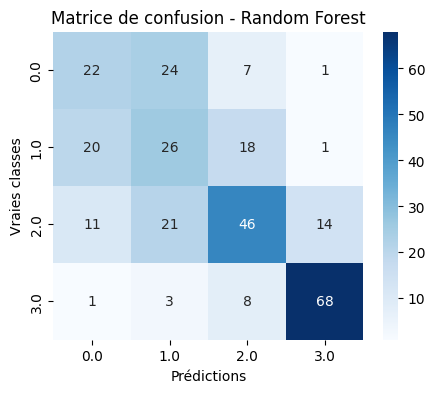

Random Forest - Accuracy: 0.5567 - F1 Score: 0.5572 - Temps d'exécution: 0.4249 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


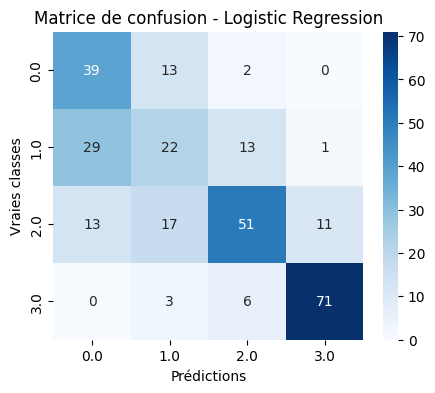

Logistic Regression - Accuracy: 0.6289 - F1 Score: 0.6252 - Temps d'exécution: 0.4729 sec
###################################################################

 Évaluation de SVC avec train_test_split...


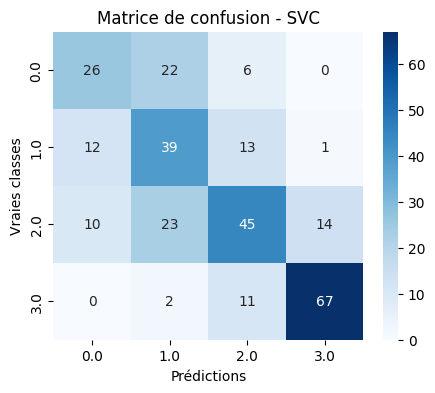

SVC - Accuracy: 0.6082 - F1 Score: 0.6078 - Temps d'exécution: 0.0462 sec
###################################################################

 Évaluation de KNN avec train_test_split...


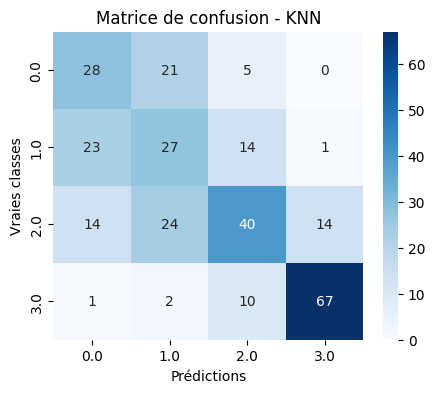

KNN - Accuracy: 0.5567 - F1 Score: 0.5579 - Temps d'exécution: 0.0484 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


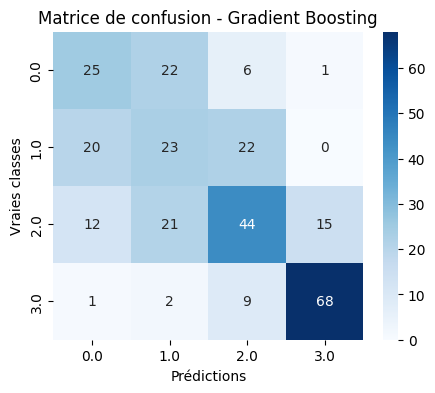

Gradient Boosting - Accuracy: 0.5498 - F1 Score: 0.5489 - Temps d'exécution: 3.2956 sec
###################################################################


In [187]:
print("**************************************Prédiction de la  consommation de  chauffage a zurich en fonction de TEXT  à toulouse et ses périphéries************************************")
Text_conso_sev_heat_tou=Text_combined_tou.copy()
Text_conso_sev_heat_tou['clusters'] = conso_zur['clusters']
Text_conso_sev_heat_tou.columns = Text_conso_sev_heat_tou.columns.astype(str)
X = Text_conso_sev_heat_tou.drop(columns=["clusters"])
y = Text_conso_sev_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.3, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [188]:
print("*************************************************Prédiction de la  consommation de chauffage a zurich en fonction de TEXT et occupation à toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage a zurich en fonction de TEXT et occupation à toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.6760 - F1 Score: 0.6732 - Temps d'exécution: 8.0061 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7055 - F1 Score: 0.6996 - Temps d'exécution: 0.5268 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.6959 - F1 Score: 0.6914 - Temps d'exécution: 0.6446 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.6616 - F1 Score: 0.6636 - Temps d'exécution: 0.0542 sec
#############

**************************************Prédiction de la  consommation de  chauffage a toulouse en fonction de solar angle  à zur et ses périphéries************************************

 Évaluation de Random Forest avec train_test_split...


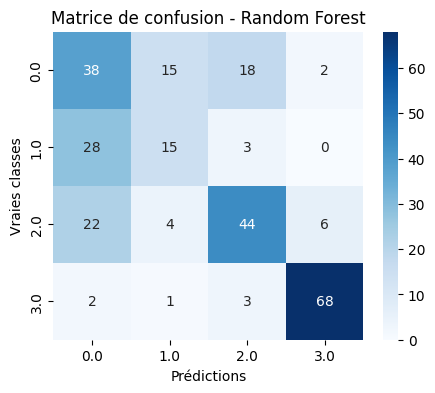

Random Forest - Accuracy: 0.6134 - F1 Score: 0.6119 - Temps d'exécution: 0.3287 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


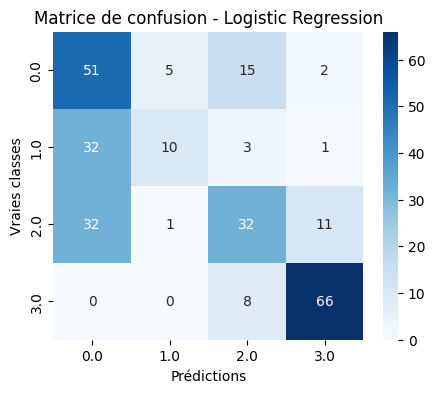

Logistic Regression - Accuracy: 0.5911 - F1 Score: 0.5731 - Temps d'exécution: 0.4947 sec
###################################################################

 Évaluation de SVC avec train_test_split...


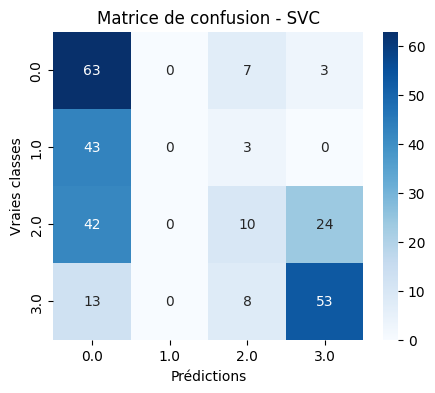

SVC - Accuracy: 0.4684 - F1 Score: 0.3898 - Temps d'exécution: 0.0459 sec
###################################################################

 Évaluation de KNN avec train_test_split...


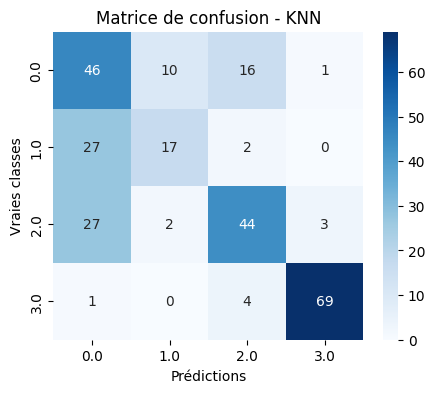

KNN - Accuracy: 0.6543 - F1 Score: 0.6543 - Temps d'exécution: 0.0319 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


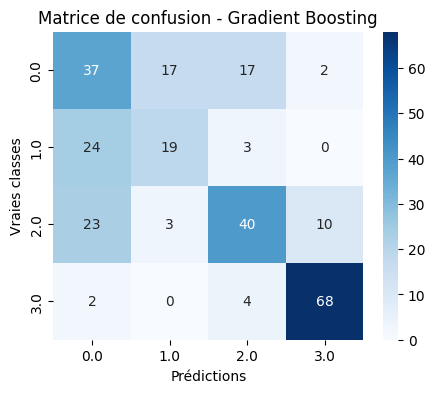

Gradient Boosting - Accuracy: 0.6097 - F1 Score: 0.6071 - Temps d'exécution: 1.9658 sec
###################################################################


In [205]:
print("**************************************Prédiction de la  consommation de  chauffage a toulouse en fonction de solar angle  à zur et ses périphéries************************************")
Solar_conso_tou_heat_zur=Solar_combined_zur.copy()
Solar_conso_tou_heat_zur['clusters'] = conso_tou['clusters']
Solar_conso_tou_heat_zur.columns = Solar_conso_tou_heat_zur.columns.astype(str)
X = Solar_conso_tou_heat_zur.drop(columns=["clusters"])
y = Solar_conso_tou_heat_zur["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.3, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [206]:
print("**************************************Prédiction de la  consommation de  chauffage a toulouse en fonction de solar angle  à zur et ses périphéries************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**************************************Prédiction de la  consommation de  chauffage a toulouse en fonction de solar angle  à zur et ses périphéries************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7349 - F1 Score: 0.7339 - Temps d'exécution: 3.2174 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7205 - F1 Score: 0.6621 - Temps d'exécution: 0.4717 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7192 - F1 Score: 0.6543 - Temps d'exécution: 0.6363 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7678 - F1 Score: 0.7674 - Temps d'exécution: 0.0848 sec
#############################################

*************************************************Prédiction de la  consommation de  chauufage  en fonction de TEXT ,humidite,wind,solar angle,groud reflect  à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec train_test_split...


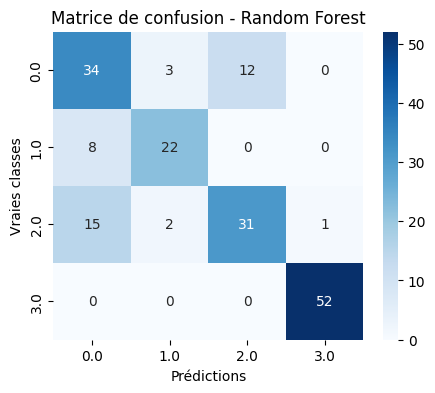

Random Forest - Accuracy: 0.7722 - F1 Score: 0.7729 - Temps d'exécution: 0.3861 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


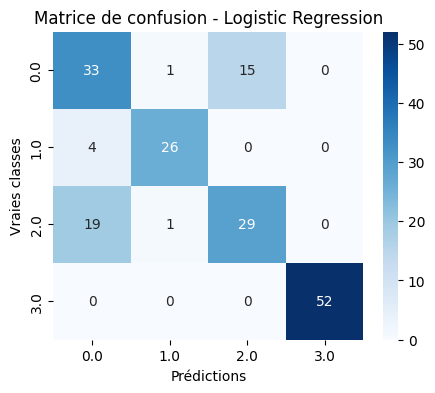

Logistic Regression - Accuracy: 0.7778 - F1 Score: 0.7792 - Temps d'exécution: 0.6353 sec
###################################################################

 Évaluation de SVC avec train_test_split...


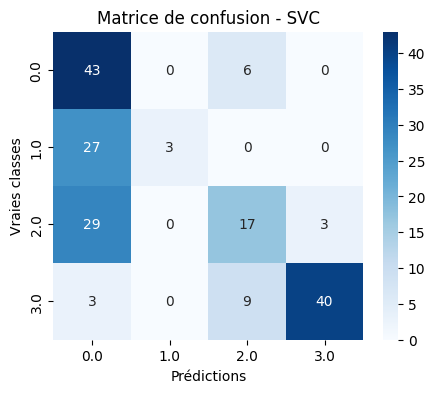

SVC - Accuracy: 0.5722 - F1 Score: 0.5429 - Temps d'exécution: 0.0666 sec
###################################################################

 Évaluation de KNN avec train_test_split...


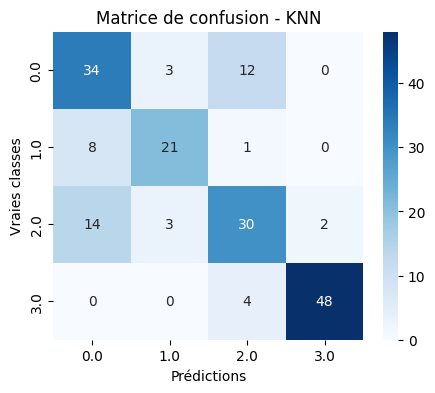

KNN - Accuracy: 0.7389 - F1 Score: 0.7411 - Temps d'exécution: 0.0268 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


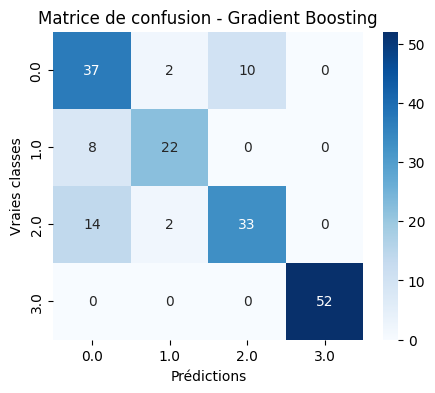

Gradient Boosting - Accuracy: 0.8000 - F1 Score: 0.8017 - Temps d'exécution: 4.8915 sec
###################################################################


In [155]:
print("*************************************************Prédiction de la  consommation de  chauufage  en fonction de TEXT ,humidite,wind,solar angle,groud reflect  à zurich et ses périphéries*************************************************")
X = Text_Wind_Solar_Ground_conso_heat_tou.drop(columns=["clusters"])
y = Text_Wind_Solar_Ground_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [156]:
print("*************************************************Prédiction de la  consommation de  chauufage  en fonction de TEXT ,humidite,wind,solar angle,groud reflect  à zurich et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de  chauufage  en fonction de TEXT ,humidite,wind,solar angle,groud reflect  à zurich et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8596 - F1 Score: 0.8601 - Temps d'exécution: 3.2138 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8740 - F1 Score: 0.8746 - Temps d'exécution: 1.0467 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8610 - F1 Score: 0.8615 - Temps d'exécution: 0.3933 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8452 - F1 Score: 0.8448 - Temps d'exécution: 0.078

In [209]:
Text_conso_heat_tou

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,heat_on,clusters
0,10.40,10.45,10.40,10.25,10.20,10.15,10.10,10.10,10.15,10.50,...,13.70,13.10,12.60,12.25,11.95,11.60,11.25,10.90,1,0.0
1,10.45,9.80,9.15,8.75,8.45,8.10,7.80,7.55,7.40,7.45,...,9.60,9.15,8.75,8.45,8.20,7.95,7.65,7.15,1,0.0
2,7.05,7.30,7.30,7.30,7.35,7.45,7.50,7.55,7.60,7.85,...,12.20,11.65,11.10,10.70,10.30,9.80,9.35,8.75,1,0.0
3,8.30,8.00,7.35,6.85,6.55,6.25,5.95,5.70,5.60,6.00,...,9.85,9.20,8.45,7.75,7.10,6.45,5.80,5.15,1,1.0
4,4.55,4.00,3.45,3.05,2.75,2.45,2.25,2.10,2.00,3.00,...,11.10,9.70,8.65,8.10,7.55,7.05,6.50,5.95,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-3.25,-3.25,-3.30,-3.35,-3.45,-3.50,-3.55,-3.60,-3.60,-3.00,...,1.10,0.30,-0.30,-0.55,-0.80,-1.00,-1.20,-1.45,1,1.0
1456,-1.55,-1.40,-1.25,-1.15,-1.05,-0.95,-0.85,-0.75,-0.65,0.15,...,6.10,5.20,4.60,4.45,4.30,4.15,4.00,3.85,1,1.0
1457,3.60,3.15,2.70,2.40,2.15,1.90,1.70,1.50,1.45,2.20,...,7.95,7.00,6.35,6.30,6.30,6.25,6.20,6.20,1,0.0
1458,6.25,6.40,6.55,6.65,6.80,6.95,7.05,7.15,7.20,7.55,...,10.45,10.05,9.45,9.20,9.20,8.95,8.60,8.30,1,0.0


compraison entre prediciton sur 24h et  24h+hier
*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries *************************************************

 Évaluation de Random Forest avec train_test_split...


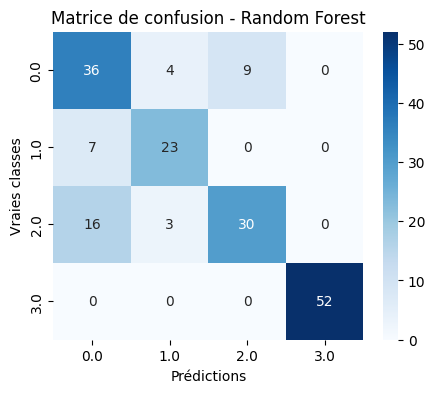

Random Forest - Accuracy: 0.7833 - F1 Score: 0.7838 - Temps d'exécution: 0.7829 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


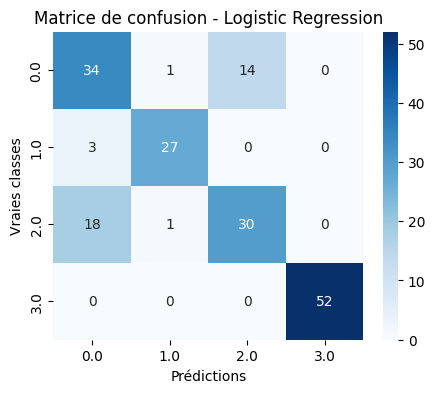

Logistic Regression - Accuracy: 0.7944 - F1 Score: 0.7950 - Temps d'exécution: 0.4787 sec
###################################################################

 Évaluation de SVC avec train_test_split...


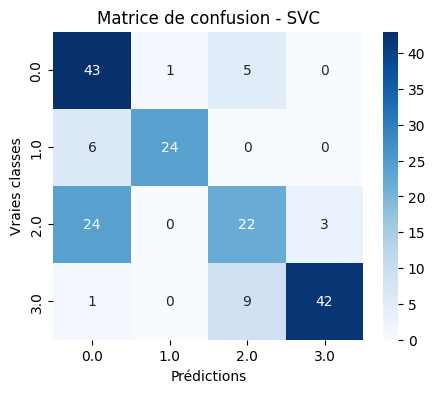

SVC - Accuracy: 0.7278 - F1 Score: 0.7269 - Temps d'exécution: 0.0339 sec
###################################################################

 Évaluation de KNN avec train_test_split...


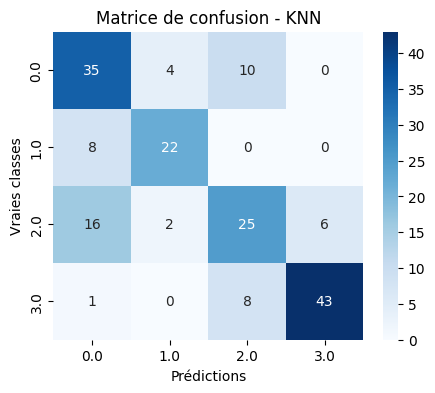

KNN - Accuracy: 0.6944 - F1 Score: 0.6952 - Temps d'exécution: 0.0200 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


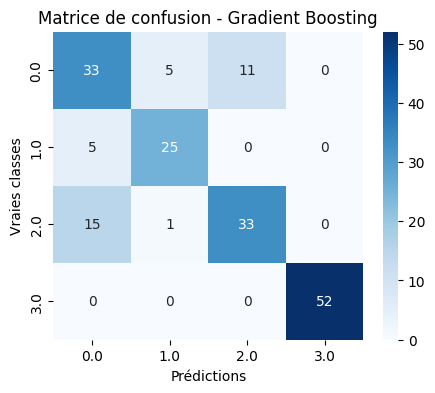

Gradient Boosting - Accuracy: 0.7944 - F1 Score: 0.7948 - Temps d'exécution: 2.9750 sec
###################################################################


In [249]:
print("compraison entre prediciton sur 24h et  24h+hier") 

print("*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries *************************************************")
X = Text_conso_heat_tou.drop(columns=["clusters"])
y = Text_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)

results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [250]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8630 - F1 Score: 0.8634 - Temps d'exécution: 3.4531 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8769 - Temps d'exécution: 0.4498 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8555 - F1 Score: 0.8564 - Temps d'exécution: 0.3271 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8582 - F1 Score: 0.8584 - Temps d'exécution: 0.0618 sec
####################################

In [231]:
n_rows = len(Text_conso_heat_tou) - 1
new_data = []
for i in range(1, n_rows + 1):  
    yesterday = Text_conso_heat_tou.iloc[i-1, :24].values 
    today = Text_conso_heat_tou.iloc[i, :24].values  
    heat_on_today = Text_conso_heat_tou.iloc[i, 24]  
    clusters_today = Text_conso_heat_tou.iloc[i, 25]  

    new_data.append(list(yesterday) + list(today) + [heat_on_today, clusters_today])


Text_conso_heat_tou_2days = pd.DataFrame(new_data, columns=[*range(48), "heat_on", "clusters"])
Text_conso_heat_tou_2days.columns = Text_conso_heat_tou_2days.columns.astype(str)



*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries  today+yesterday 48h*************************************************

 Évaluation de Random Forest avec train_test_split...


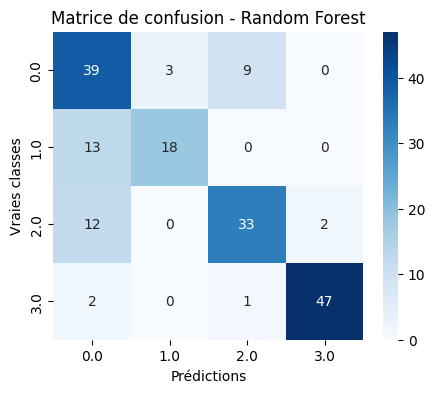

Random Forest - Accuracy: 0.7654 - F1 Score: 0.7676 - Temps d'exécution: 0.4528 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


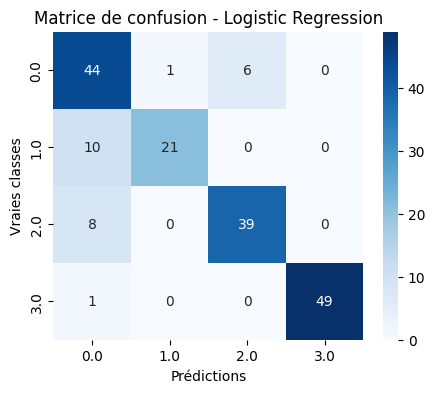

Logistic Regression - Accuracy: 0.8547 - F1 Score: 0.8563 - Temps d'exécution: 0.4833 sec
###################################################################

 Évaluation de SVC avec train_test_split...


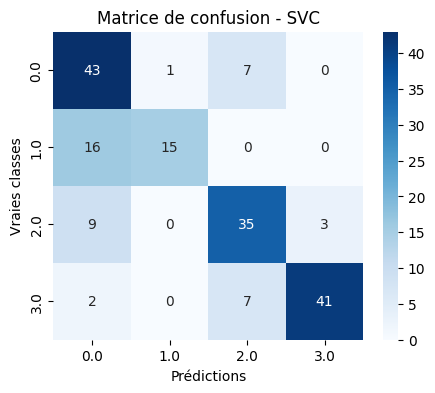

SVC - Accuracy: 0.7486 - F1 Score: 0.7482 - Temps d'exécution: 0.0339 sec
###################################################################

 Évaluation de KNN avec train_test_split...


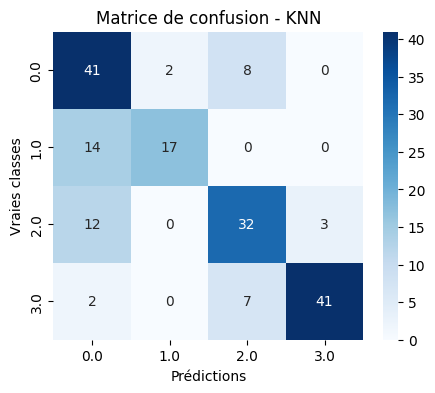

KNN - Accuracy: 0.7318 - F1 Score: 0.7349 - Temps d'exécution: 0.0279 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


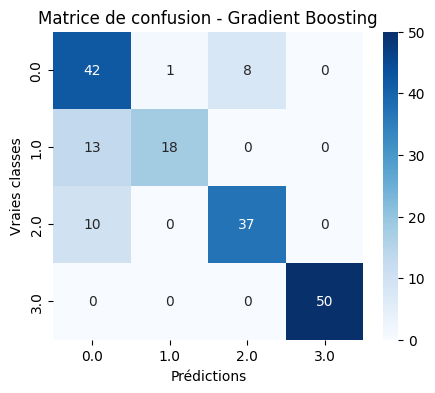

Gradient Boosting - Accuracy: 0.8212 - F1 Score: 0.8215 - Temps d'exécution: 4.5937 sec
###################################################################


In [251]:
print("*************************************************Prédiction de la  consommation de chauffage  en fonction de TEXT  à Toulouse et ses périphéries  today+yesterday 48h*************************************************")
X = Text_conso_heat_tou_2days.drop(columns=["clusters"])
y = Text_conso_heat_tou_2days["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)

X_train,X_test,y_train,y_test=train_test_split(X_balanced, y_balanced,test_size=0.2, random_state=42)

results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [252]:
print("*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction de la  consommation de chauffage en fonction de TEXT à Toulouse et ses périphéries*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9040 - F1 Score: 0.9043 - Temps d'exécution: 4.2142 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9212 - F1 Score: 0.9210 - Temps d'exécution: 0.5485 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9075 - F1 Score: 0.9073 - Temps d'exécution: 0.2992 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.9054 - F1 Score: 0.9054 - Temps d'exécution: 0.0708 sec
####################################

************************************************* (partitionnement des donnees chaque partie seul )Prédiction de la  consommation de chauffagr  en fonction de TEXT  à toulouse et ses périphéries sur 24 heures*************************************************
##########################partie 1 ##########################

 Évaluation de Random Forest avec train_test_split...


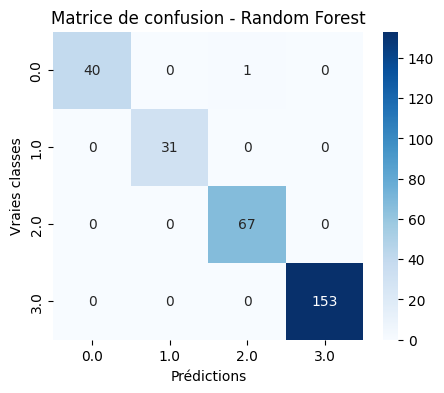

Random Forest - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 0.2886 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


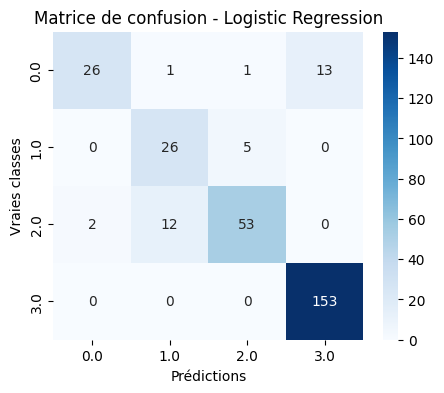

Logistic Regression - Accuracy: 0.8836 - F1 Score: 0.8803 - Temps d'exécution: 0.5341 sec
###################################################################

 Évaluation de SVC avec train_test_split...


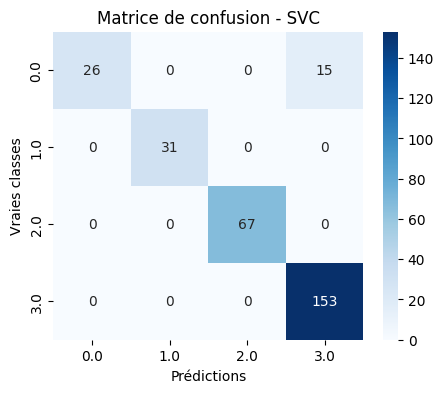

SVC - Accuracy: 0.9486 - F1 Score: 0.9441 - Temps d'exécution: 0.0279 sec
###################################################################

 Évaluation de KNN avec train_test_split...


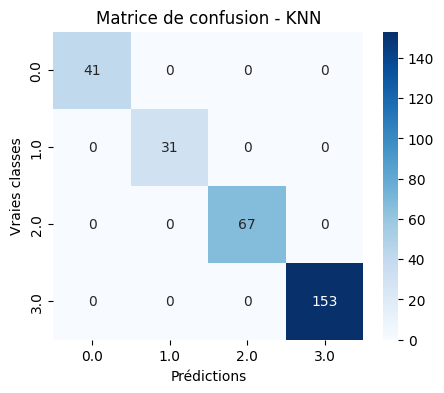

KNN - Accuracy: 1.0000 - F1 Score: 1.0000 - Temps d'exécution: 0.0459 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


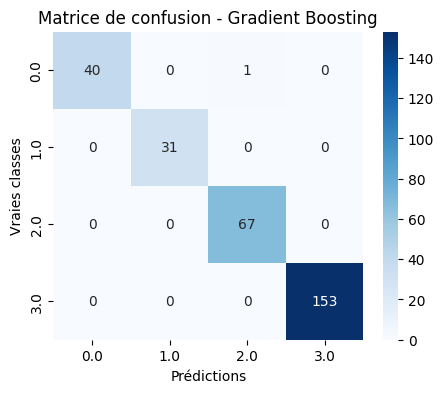

Gradient Boosting - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 0.9654 sec
###################################################################
##########################partie 2 ##########################

 Évaluation de Random Forest avec train_test_split...


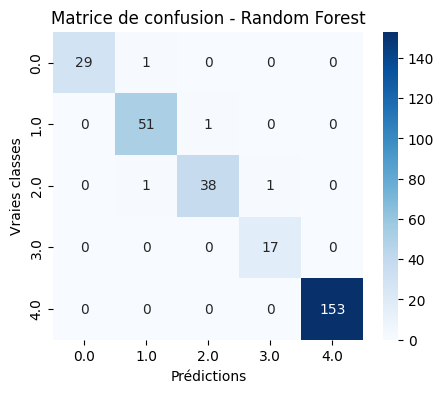

Random Forest - Accuracy: 0.9863 - F1 Score: 0.9863 - Temps d'exécution: 0.2344 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


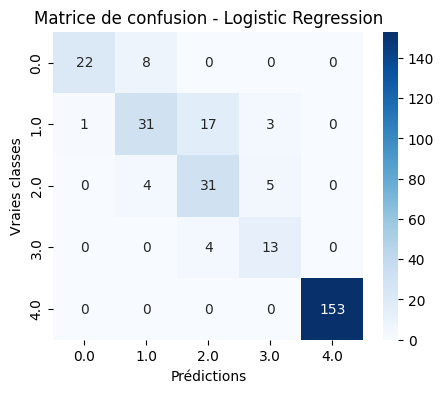

Logistic Regression - Accuracy: 0.8562 - F1 Score: 0.8576 - Temps d'exécution: 0.7049 sec
###################################################################

 Évaluation de SVC avec train_test_split...


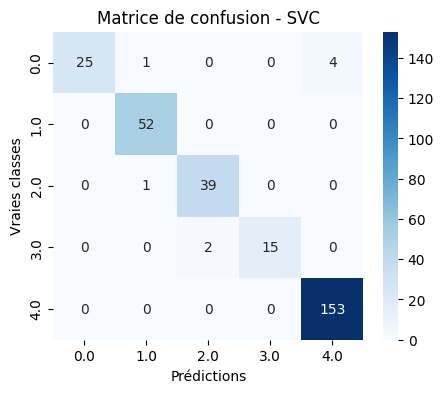

SVC - Accuracy: 0.9726 - F1 Score: 0.9718 - Temps d'exécution: 0.0259 sec
###################################################################

 Évaluation de KNN avec train_test_split...


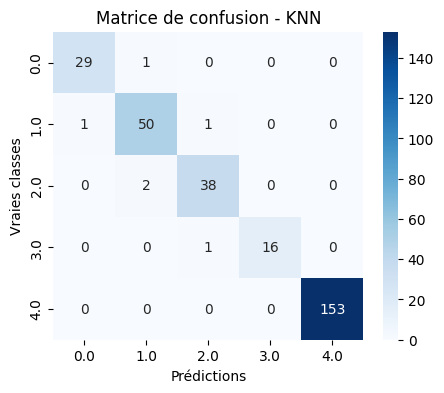

KNN - Accuracy: 0.9795 - F1 Score: 0.9795 - Temps d'exécution: 0.0289 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


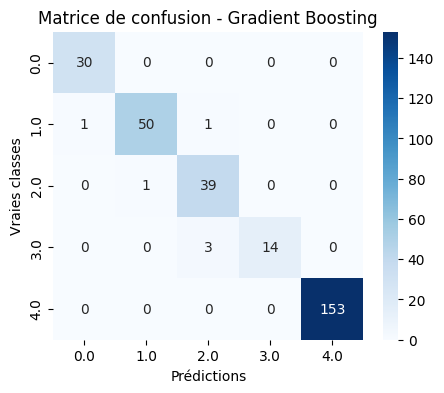

Gradient Boosting - Accuracy: 0.9795 - F1 Score: 0.9792 - Temps d'exécution: 1.5038 sec
###################################################################
##########################partie 3 ##########################

 Évaluation de Random Forest avec train_test_split...


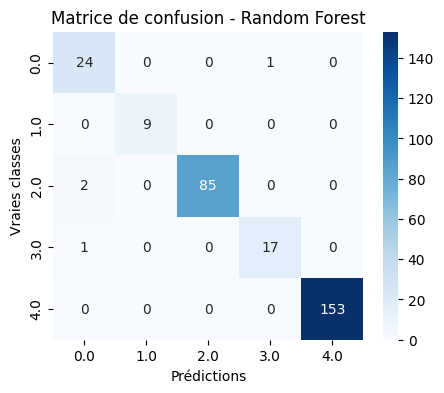

Random Forest - Accuracy: 0.9863 - F1 Score: 0.9865 - Temps d'exécution: 0.2473 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


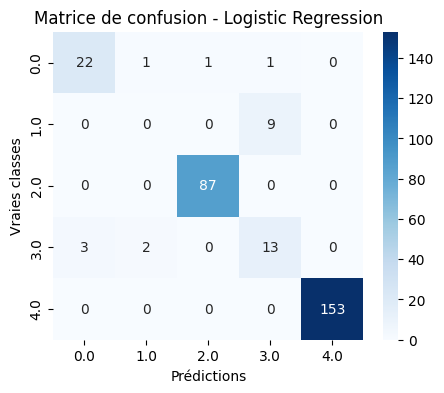

Logistic Regression - Accuracy: 0.9418 - F1 Score: 0.9346 - Temps d'exécution: 0.5642 sec
###################################################################

 Évaluation de SVC avec train_test_split...


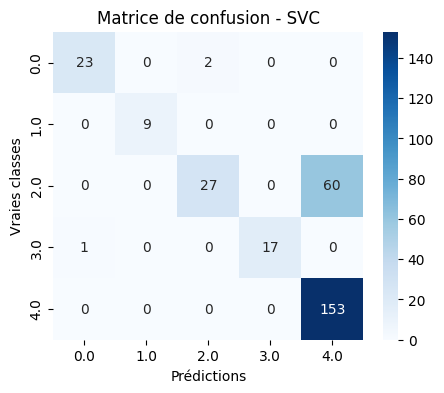

SVC - Accuracy: 0.7842 - F1 Score: 0.7479 - Temps d'exécution: 0.0429 sec
###################################################################

 Évaluation de KNN avec train_test_split...


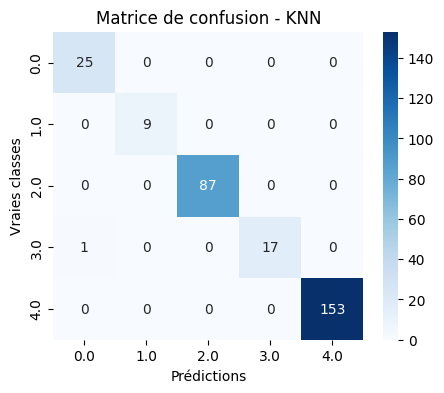

KNN - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 0.0299 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


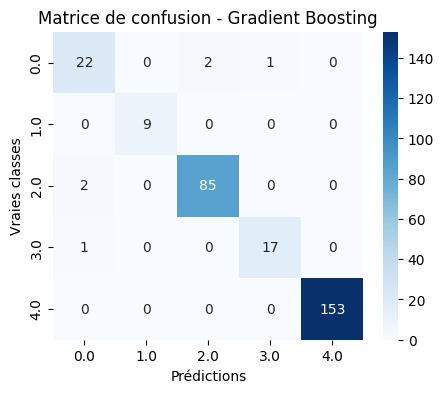

Gradient Boosting - Accuracy: 0.9795 - F1 Score: 0.9795 - Temps d'exécution: 0.9963 sec
###################################################################
##########################partie 4 ##########################

 Évaluation de Random Forest avec train_test_split...


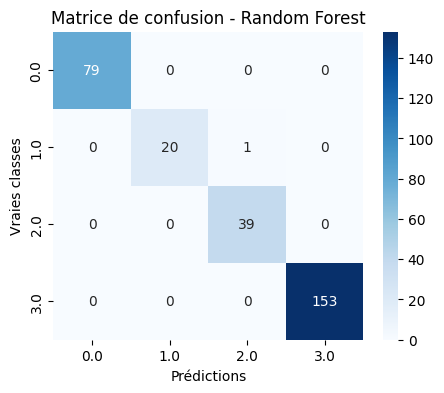

Random Forest - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 0.2074 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


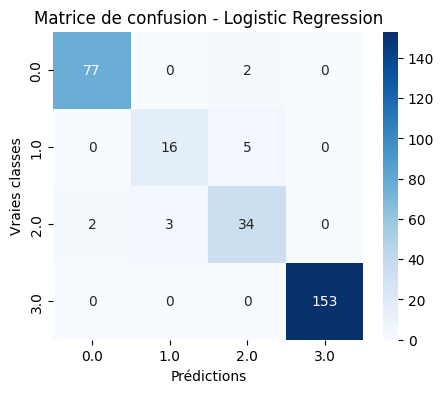

Logistic Regression - Accuracy: 0.9589 - F1 Score: 0.9587 - Temps d'exécution: 0.5993 sec
###################################################################

 Évaluation de SVC avec train_test_split...


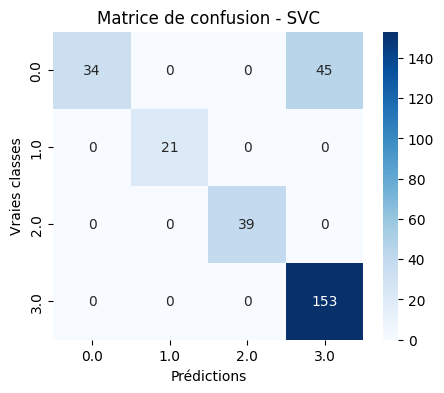

SVC - Accuracy: 0.8459 - F1 Score: 0.8251 - Temps d'exécution: 0.0389 sec
###################################################################

 Évaluation de KNN avec train_test_split...


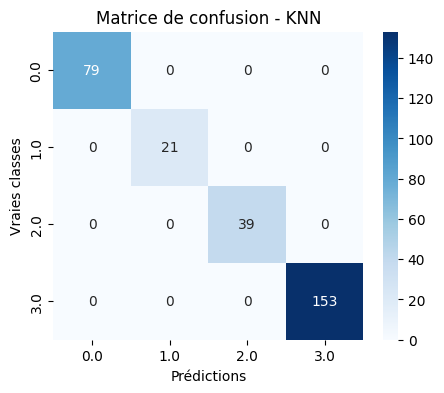

KNN - Accuracy: 1.0000 - F1 Score: 1.0000 - Temps d'exécution: 0.0399 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


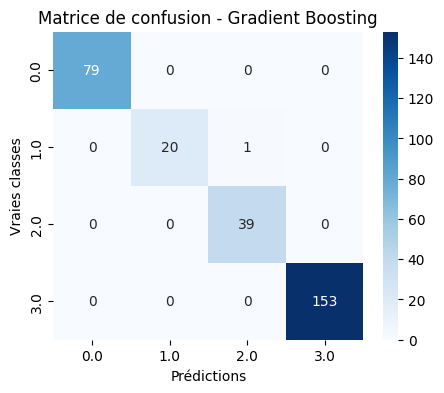

Gradient Boosting - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 0.9564 sec
###################################################################


In [239]:

print("************************************************* (partitionnement des donnees chaque partie seul )Prédiction de la  consommation de chauffagr  en fonction de TEXT  à toulouse et ses périphéries sur 24 heures*************************************************")
for i in range(1, 5):
    print(f"##########################partie {i} ##########################")
    consommation_partitionner_24h_i = consommation_partitionner_24h[i]
    X = consommation_partitionner_24h_i.drop(columns=["clusters"])
    y = consommation_partitionner_24h_i["clusters"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_split = evaluate_models_split(X_train, X_test, y_train, y_test, models)


************************************************* (partitionnement des donnees chaque partie seul )Prédiction de la  consommation de chauffagr  en fonction de TEXT  à toulouse et ses périphéries sur 48 heures*************************************************
##########################partie 1 ##########################

 Évaluation de Random Forest avec train_test_split...


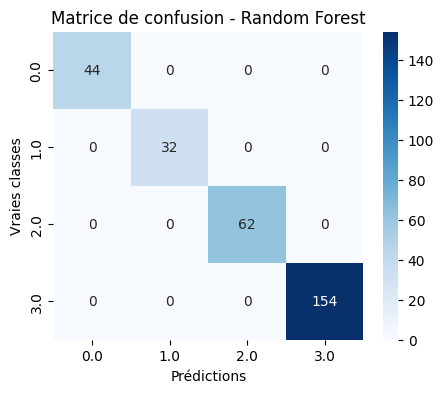

Random Forest - Accuracy: 1.0000 - F1 Score: 1.0000 - Temps d'exécution: 0.2782 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


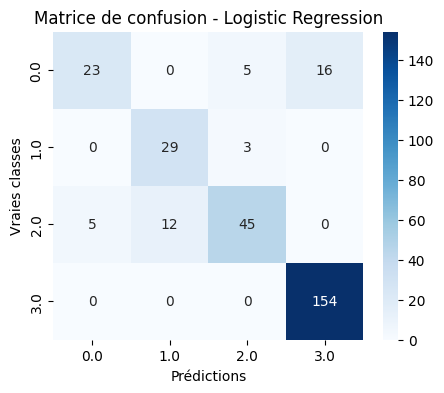

Logistic Regression - Accuracy: 0.8596 - F1 Score: 0.8509 - Temps d'exécution: 0.6459 sec
###################################################################

 Évaluation de SVC avec train_test_split...


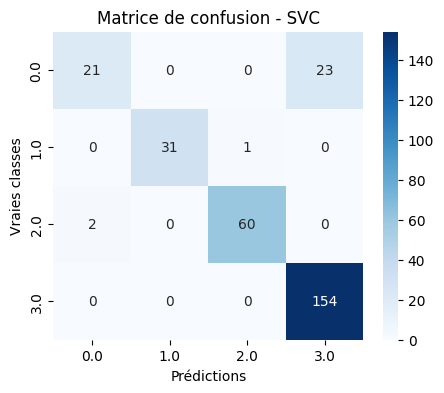

SVC - Accuracy: 0.9110 - F1 Score: 0.9002 - Temps d'exécution: 0.0299 sec
###################################################################

 Évaluation de KNN avec train_test_split...


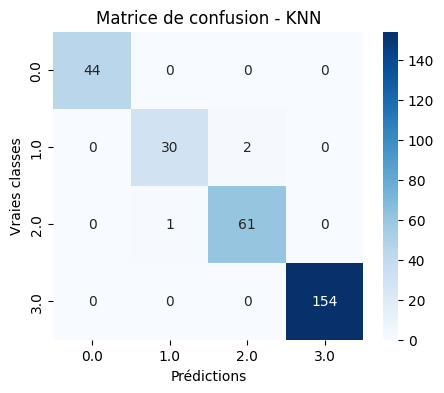

KNN - Accuracy: 0.9897 - F1 Score: 0.9897 - Temps d'exécution: 0.0329 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


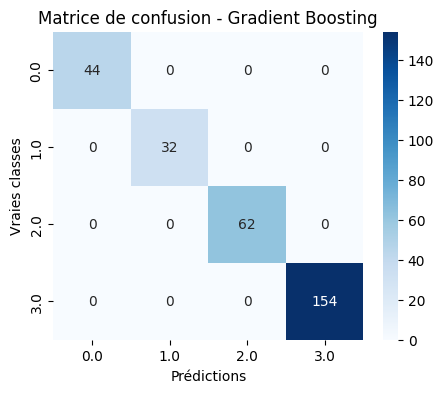

Gradient Boosting - Accuracy: 1.0000 - F1 Score: 1.0000 - Temps d'exécution: 1.3993 sec
###################################################################
##########################partie 2 ##########################

 Évaluation de Random Forest avec train_test_split...


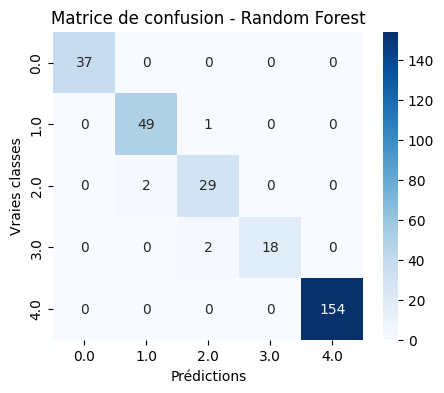

Random Forest - Accuracy: 0.9829 - F1 Score: 0.9829 - Temps d'exécution: 0.3012 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


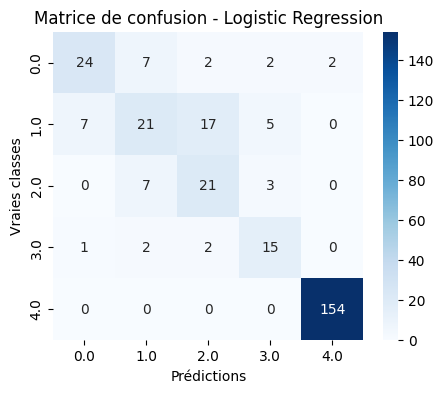

Logistic Regression - Accuracy: 0.8048 - F1 Score: 0.8015 - Temps d'exécution: 0.5696 sec
###################################################################

 Évaluation de SVC avec train_test_split...


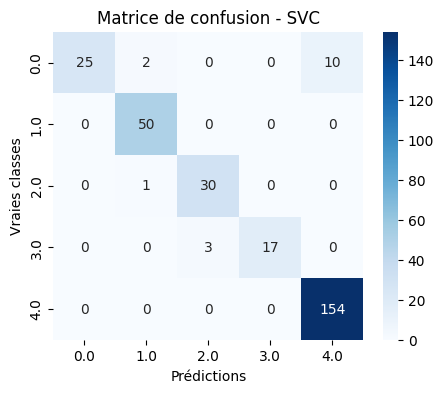

SVC - Accuracy: 0.9452 - F1 Score: 0.9417 - Temps d'exécution: 0.0239 sec
###################################################################

 Évaluation de KNN avec train_test_split...


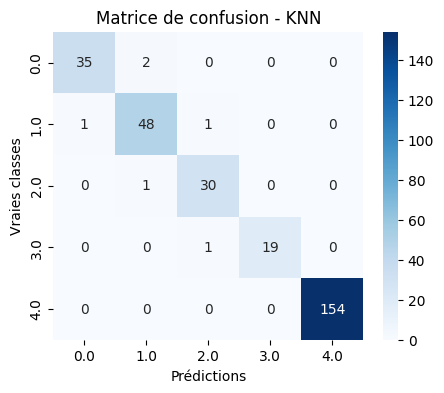

KNN - Accuracy: 0.9795 - F1 Score: 0.9795 - Temps d'exécution: 0.0339 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


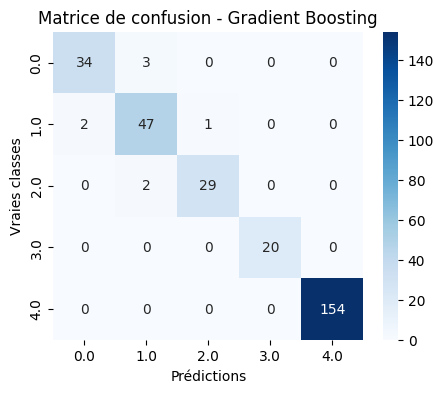

Gradient Boosting - Accuracy: 0.9726 - F1 Score: 0.9727 - Temps d'exécution: 1.9468 sec
###################################################################
##########################partie 3 ##########################

 Évaluation de Random Forest avec train_test_split...


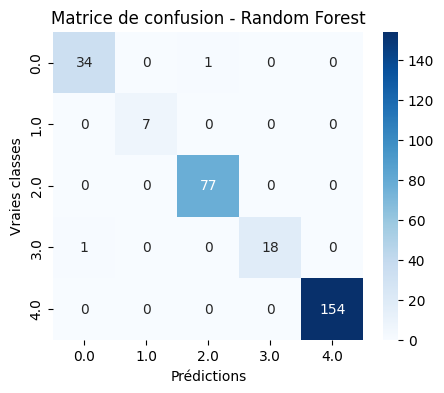

Random Forest - Accuracy: 0.9932 - F1 Score: 0.9931 - Temps d'exécution: 0.2703 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


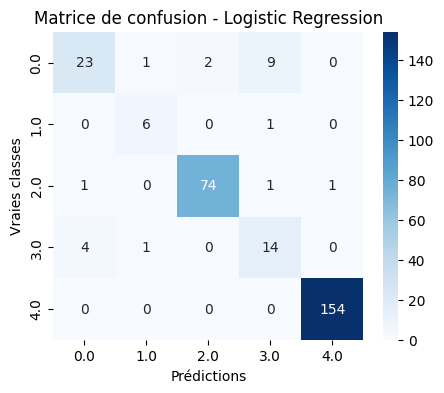

Logistic Regression - Accuracy: 0.9281 - F1 Score: 0.9289 - Temps d'exécution: 0.5712 sec
###################################################################

 Évaluation de SVC avec train_test_split...


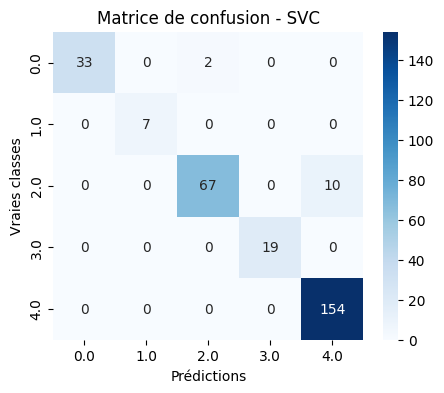

SVC - Accuracy: 0.9589 - F1 Score: 0.9582 - Temps d'exécution: 0.0229 sec
###################################################################

 Évaluation de KNN avec train_test_split...


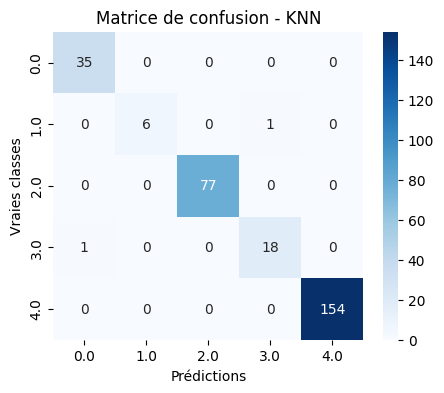

KNN - Accuracy: 0.9932 - F1 Score: 0.9930 - Temps d'exécution: 0.0309 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


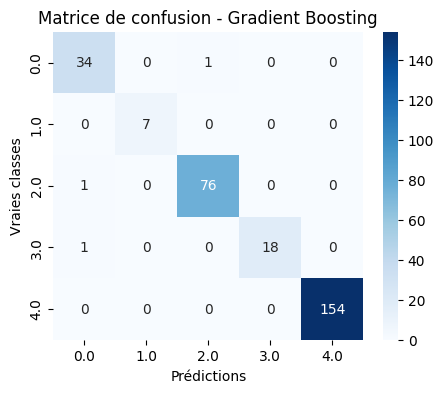

Gradient Boosting - Accuracy: 0.9897 - F1 Score: 0.9898 - Temps d'exécution: 1.7124 sec
###################################################################
##########################partie 4 ##########################

 Évaluation de Random Forest avec train_test_split...


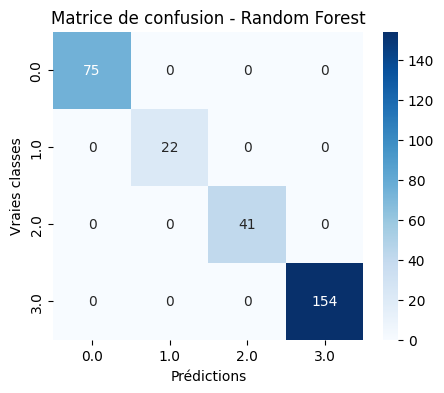

Random Forest - Accuracy: 1.0000 - F1 Score: 1.0000 - Temps d'exécution: 0.2424 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


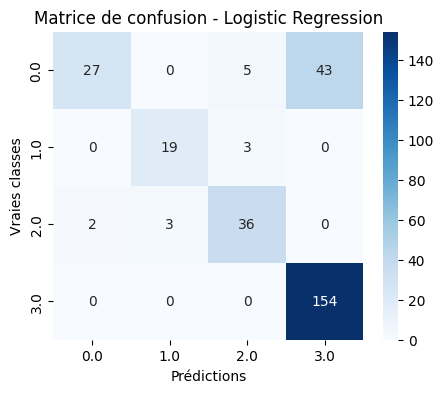

Logistic Regression - Accuracy: 0.8082 - F1 Score: 0.7802 - Temps d'exécution: 0.5879 sec
###################################################################

 Évaluation de SVC avec train_test_split...


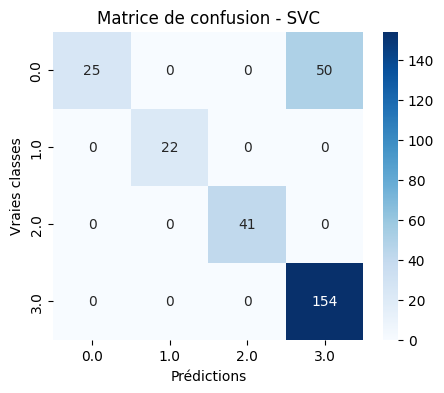

SVC - Accuracy: 0.8288 - F1 Score: 0.7979 - Temps d'exécution: 0.0419 sec
###################################################################

 Évaluation de KNN avec train_test_split...


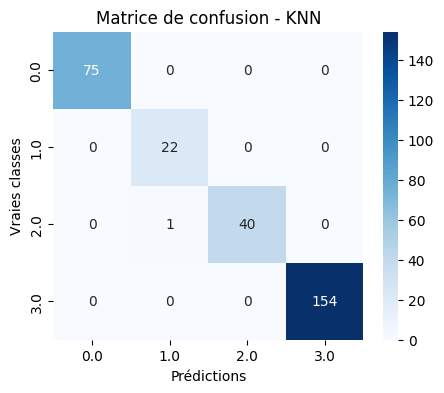

KNN - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 0.0429 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


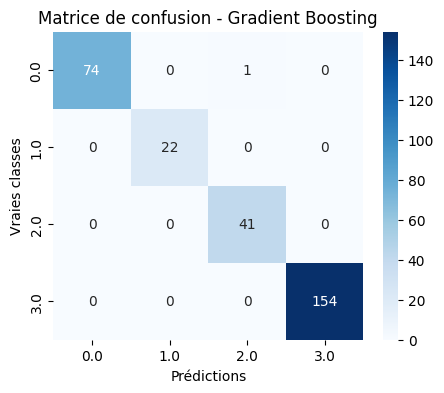

Gradient Boosting - Accuracy: 0.9966 - F1 Score: 0.9966 - Temps d'exécution: 1.4214 sec
###################################################################


In [243]:
print("************************************************* (partitionnement des donnees chaque partie seul )Prédiction de la  consommation de chauffagr  en fonction de TEXT  à toulouse et ses périphéries sur 48 heures*************************************************")
for i in range(1, 5):
    print(f"##########################partie {i} ##########################")
    consommation_partitionner_48h_i = consommation_partitionner_48h[i]
    X = consommation_partitionner_48h_i.drop(columns=["cluster"])
    y = consommation_partitionner_48h_i["cluster"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_split = evaluate_models_split(X_train, X_test, y_train, y_test, models)